In [111]:
import pandas as pd
import numpy as np

In [112]:
data = pd.read_csv('./movies_metadata.csv', index_col='id')
data.columns

/tmp/ipykernel_92903/2173573420.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./movies_metadata.csv', index_col='id')


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [113]:
data = data.drop(['adult', 'belongs_to_collection', 'homepage', 'original_language', 'overview', 'poster_path', 'production_companies', 'spoken_languages', 'status', 'tagline', 'video', 'original_title', 'genres'], axis=1)

In [142]:
data['production_countries'].replace('[]', np.nan, inplace=True)
data['budget'].replace('0', np.nan, inplace=True)
data['revenue'].replace(0, np.nan, inplace=True)
data['runtime'].replace(0, np.nan, inplace=True)
data['vote_average'].replace(0, np.nan, inplace=True)
data['vote_count'].replace(0, np.nan, inplace=True)

In [143]:
data.dropna(subset=['budget', 'imdb_id', 'revenue', 'runtime', 'title', 'vote_average', 'vote_count', 'production_countries', 'release_date'], inplace=True)

In [144]:
data.isnull().sum()

budget                  0
imdb_id                 0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [145]:
data.min()

/tmp/ipykernel_92903/927168777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.min()


budget                                                                  1
imdb_id                                                         tt0004972
production_countries    [{'iso_3166_1': 'AE', 'name': 'United Arab Emi...
release_date                                                   1915-02-08
revenue                                                               1.0
runtime                                                              26.0
title                                                (500) Days of Summer
vote_average                                                          1.0
vote_count                                                            1.0
dtype: object

In [146]:
data.max()

/tmp/ipykernel_92903/2904433368.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.max()


budget                                                          994000
imdb_id                                                      tt6673840
production_countries    [{'iso_3166_1': 'ZA', 'name': 'South Africa'}]
release_date                                                2017-08-04
revenue                                                   2787965087.0
runtime                                                          338.0
title                                                         Æon Flux
vote_average                                                       9.1
vote_count                                                     14075.0
dtype: object

In [200]:
for i in range(data.release_date.size):
    data.release_date[i] = data.release_date[i][:4]

/tmp/ipykernel_92903/475231589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.release_date[i] = data.release_date[i][:4]


In [195]:
import re

for i in range(data.production_countries.size):
    s = re.search("me': '", data.production_countries[i]).span()[0] + 6
    e = re.search("'}", data.production_countries[i]).span()[1] - 2
    data.production_countries[i] = data.production_countries[i][s:e]
    print(data.production_countries[i])

/tmp/ipykernel_92903/3499736417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.production_countries[i] = data.production_countries[i][s:e]


United States of America
United States of America
United States of America
United States of America
United States of America
United Kingdom
United States of America
United States of America
France
France
United Kingdom
United States of America
United States of America
United States of America
United States of America
France
United States of America
United States of America
France
United States of America
Australia
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
Canada
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America
United States of America


Usable features:

    - `budget`
    - (look into preprocessing `genres` out of the data)
    - (look into preprocessing `production_countries` out of the data) -  DONE
    - `imdb_id` or `title` at the base
    - `release_date` to release year
    - `revenue`
    - `runtime`
    - `vote_average`
    - `vote_count`

In [202]:
data.to_csv('./preprocessed_movies.csv')

In [260]:
newer = 0
older = 0
for i in range (data.budget.size):
    if int(data.budget[i])<int(data.revenue[i]) and int(data.vote_average[i]) > 6:
        newer += 1
    else:
        older +=1

print(newer, older)

1045 4261


MOVIE

BEFORE 2005 or AFTER 2005       :        2443 vs 2863

BUDGET > 14000000, < 14000000       : 2944 vs 2362

Profitable vs Non-profitable        : 3732 vs 1574

VOTER RATING > 6            : 1045 vs 4261
 

### SEE WHAT WE'RE TRYING TO DO

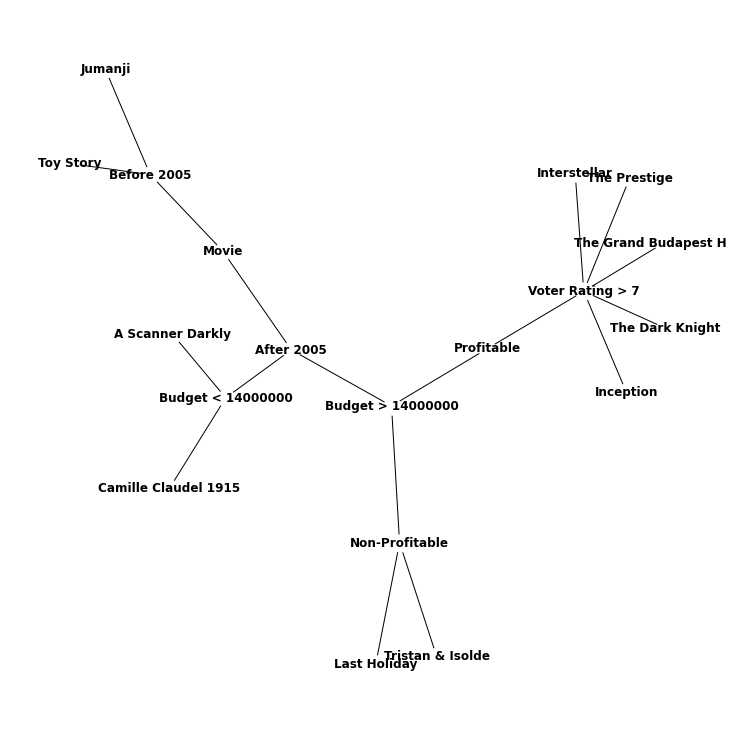

In [346]:
testData = data

import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
G = nx.Graph()

#Basic Graph
G.add_nodes_from(['Movie', 'Before 2005', 'After 2005', 'Budget > 14000000', 'Budget < 14000000', 'Profitable', 'Non-Profitable', 'Voter Rating > 7'])
G.add_edges_from([
    ('Movie', 'Before 2005'),
    ('Movie', 'After 2005'),
    ('After 2005', 'Budget > 14000000'),
    ('After 2005', 'Budget < 14000000'),
    ('Budget > 14000000', 'Profitable'),
    ('Budget > 14000000', 'Non-Profitable'),
    ('Profitable', 'Voter Rating > 7'),
    ], weight = 2)

for i in range (testData.title.size):
    if (int(testData.vote_average[i]) > 7) and (int(testData.revenue[i]) > int(testData.budget[i])) and (int(testData.budget[i]) > 14000000) and (int(testData.release_date[i]) > 2005):
        G.add_edge('Voter Rating > 7', testData.title[i], weight=1)

counter = 0
for i in range (testData.title.size):
    if counter < 2:
        if (int(testData.revenue[i]) < int(testData.budget[i])) and (int(testData.budget[i]) > 14000000) and (int(testData.release_date[i]) > 2005):
            G.add_edge('Non-Profitable', testData.title[i], weight=1)
            counter +=1

counter = 0
for i in range (testData.title.size):
    if counter < 2:
        if (int(testData.budget[i]) < 14000000) and (int(testData.release_date[i]) > 2005):
            G.add_edge('Budget < 14000000', testData.title[i], weight=1)
            counter +=1

counter = 0
for i in range (testData.title.size):
    if counter < 2:
        if (int(testData.release_date[i]) < 2005):
            G.add_edge('Before 2005', testData.title[i], weight=1)
            counter +=1

nx.draw(G, with_labels=True, node_color='white', font_weight='bold')

In [314]:
testData = data

In [317]:
count = 0
for i in range (testData.title.size):
    if (int(testData.vote_average[i]) > 7) and (int(testData.revenue[i]) > int(testData.budget[i])) and (int(testData.budget[i]) > 14000000) and (int(testData.release_date[i]) > 2005):
        count += 1

print(count)

5
